## [Correlation_Regression]
<br/>

- 두 데이터 사이의 관계를 나타내는 지표
    - 공분산
    - 상관계수
    <br/><br/>

- 상관분석
    - One way ANOVA
    <br/><br/>
    
- 회귀분석
    - One way ANOVA
    <br/><br/>
    

- ###  공분산
    - 공분산(covariance) : 2개의 확률변수의 선형 관계를 나타내는 값
    - 공분산을 쉽게 이해하기 위해서 부호를 붙인 면적을 생각하면 됨
    - 직사각형 &rarr; 가로길이 : 영어 점수의 편차 / 세로길이 : 수학 점수의 편차
    - C학생은 수학 점수 편차가 음의 값이고, 영어 점수 편차가 양의 값이므로 공분산(직사각형의 면적)은 음의 값
    <br/>
    
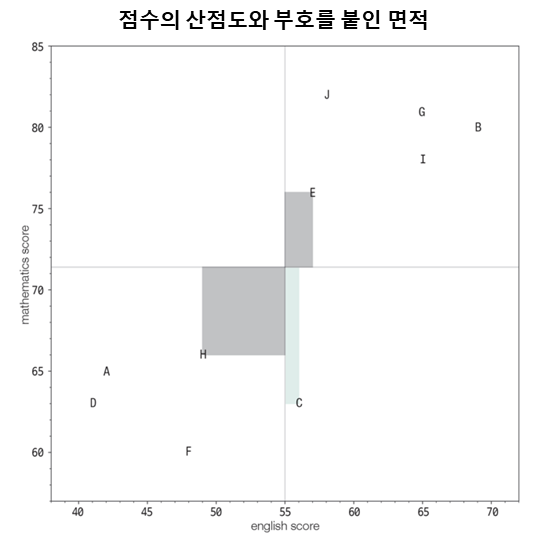
<br/>


In [2]:
# 데이터 준비

import numpy as np
import pandas as pd

df = pd.read_csv('./data/ch2_scores_em.csv', index_col='student number')

en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores, 'mathematics':ma_scores}, index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [4]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] = summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [5]:
summary_df['product of deviations'].mean()

62.8

In [6]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [7]:
cov_mat[0, 1], cov_mat[1, 0]

(62.800000000000004, 62.800000000000004)

In [8]:
cov_mat[0, 0], cov_mat[1, 1]

(86.0, 68.44000000000001)

In [9]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.0, 68.44000000000001)

- ### 상관계수
    - 상관계수(correlation coefficient) : 단위에 의존하지 않는 상관을 나타내는 지표
    - 상관계수는 아래와 같은 수식으로 표현할 수 있음
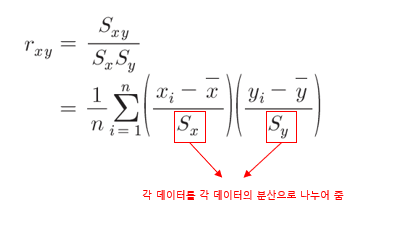
    
    - 상관계수는 𝑟_𝑥𝑦  또는 𝑟로 표현할 수 있음
    - 상관계수는 반드시 -1과 1 사이의 값을 가짐
    - 양의 상관관계에 놓여 있을수록 1에 가까워지고, 음의 상관관계에 놓여 있을수록 -1에 가까워짐 (무상관일 경우 0)
    - 상관계수가 -1 또는 1인 경우는 데이터가 완전히 직선상에 놓이게 됨
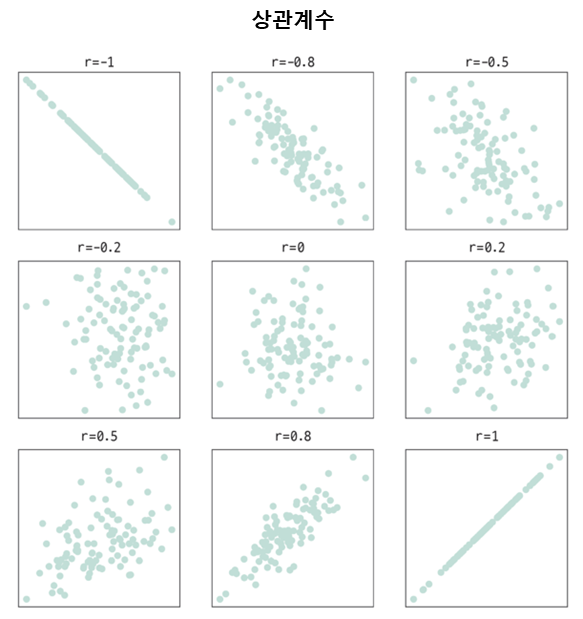

In [10]:
# 상관계수 구하는 방법 (1)

np.cov(en_scores, ma_scores, ddof=0)[0, 1] / (np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

In [12]:
# 상관계수 구하는 방법 (2)

np.corrcoef(en_scores, ma_scores)   # 상관계수는 대각선(/) 값

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [13]:
# 상관계수 구하는 방법 (3)

scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


- ### 상관분석
    - 앞 슬라이드에서 배운 것처럼 상관분석도 모수적 방법과 비모수적 방법으로 나누어 짐
    - Pearson의 상관분석은 대표적인 모수적 상관분석법으로 두 개의 데이터 중 최소 하나의 데이터가 정규성을 갖는다고 가정함
    - 이번 실습에서는 Pearson의 상관분석을 사용하여 진행할 것
    - 표본의 수가 30 이상인 경우 중심극한정리에 의해 정규성 검정 없이도 모수적 상관분석법을 적용할 수 있음
    - 아래 그림은 두 변수 데이터 각각의 성격에 따라 적용할 수 있는 상관분석법을 정리한 표임
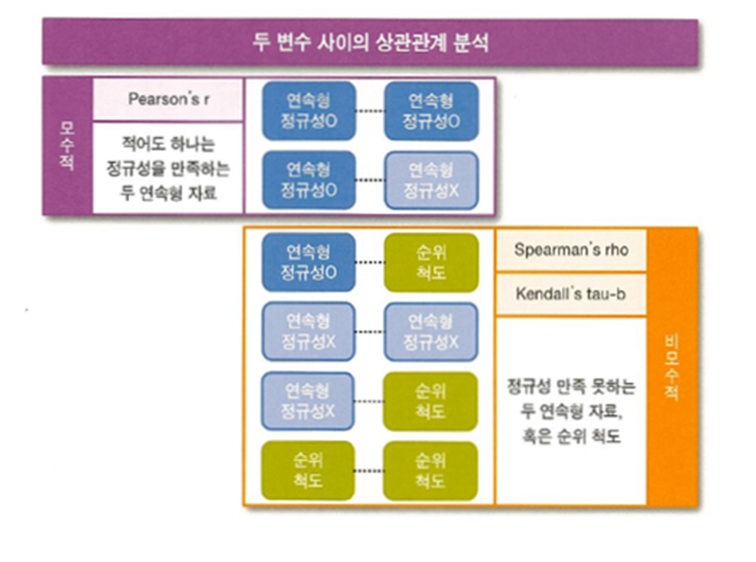

    - 결정계수 $r^2$ : 상관계수(𝑟)의 제곱으로 표현되며 두 변수 사이의 선형 관계의 정도를 설명
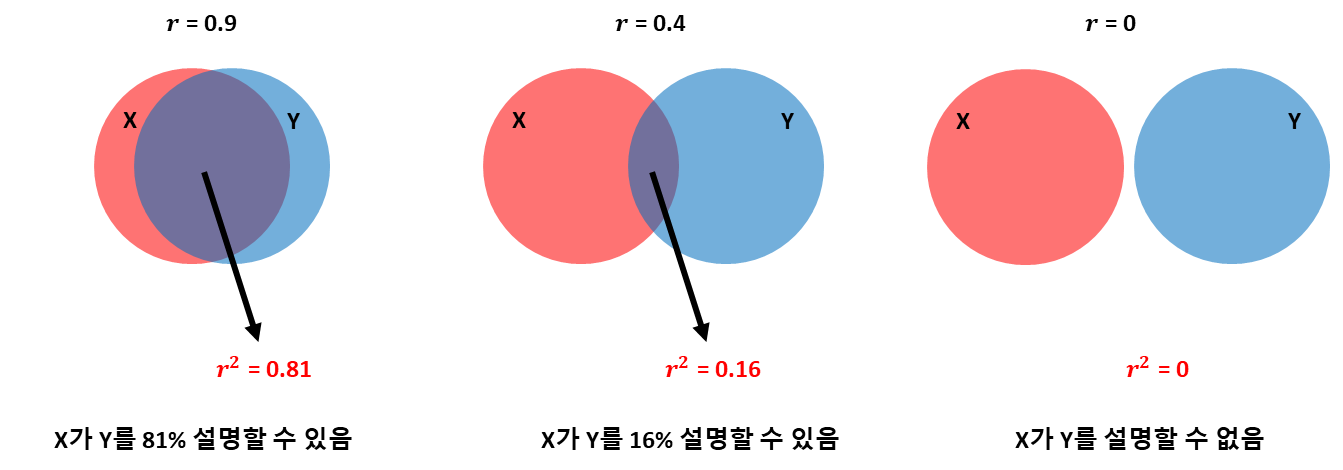

    - 귀무가설(H0) : 두 변수는 선형의 관계가 없음(r=0)
    - 대립가설(H1) : 두 변수는 선형의 관계가 있음(r=/0)

In [19]:
import numpy as np
import pandas as pd
from scipy import stats

df = pd.read_csv('./data/6_correlation_and_regression.csv')
df.head()

,age,height,weight,waistline,BMI,SBP
0,57,164.0,62.0,85.0,23.1,147
1,25,172.0,54.0,65.0,18.3,116
2,57,157.0,59.0,83.0,23.9,122
3,43,170.0,87.8,104.0,30.4,130
4,52,155.0,50.0,83.0,20.8,120


In [20]:
df.shape

(322, 6)

In [24]:
# 나이와 허리둘레에 대해 Pearson 상관분석 -> 귀무가설 채택 (상관관계 없음)

age_waistline_coef, age_waistline_p = stats.pearsonr(df['age'], df['waistline'])
age_waistline_det = age_waistline_coef ** 2   # 결정계수 r^2

print(age_waistline_coef, age_waistline_p, age_waistline_det)

0.050031455664457866 0.3708664802694068 0.002503146555904613


In [25]:
# 허리둘레와 BMI에 대해 Pearson 상관분석 -> 대립가설 채택 (상관관계 있음)

waistline_BMI_coef, waistline_BMI_p = stats.pearsonr(df['waistline'], df['BMI'])
waistline_BMI_det = waistline_BMI_coef ** 2   # 결정계수 r^2

print(waistline_BMI_coef, waistline_BMI_p, waistline_BMI_det)

0.8006600304146125 3.540002961020688e-73 0.6410564843035282


- ### 회귀분석(regression analysis)
    - 회귀분석(regression analysis) : 인과관계가 의심되는 복수의 변수를 사용하여 어느 변수로부터 다른 변수의 값을 예측하는 기법
    - 설명변수(explanatory variable) : 원인이 되는 변수, 반응변수를 예측하는데 사용되는 변수( = 독립변수 independent variable)
    - 반응변수(response variable) : 결과가 되는 변수, 예측되는 변수( = 종속변수 dependent variable)
    - 단순회귀모형(simple regression model) : 설명변수와 반응변수가 1개씩인 가장 단순한 모델
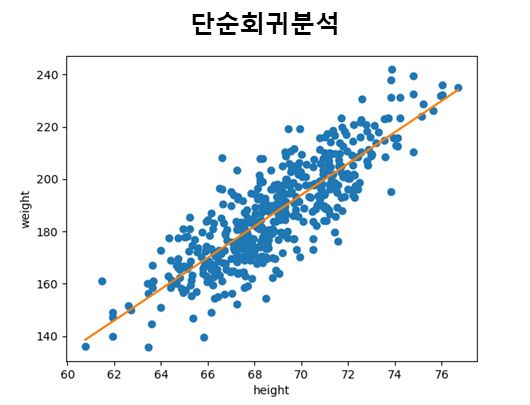

- #### 산점도와 회귀분석
    - Pearson의 상관분석에서 사용한 데이터를 사용하여 322명의 허리둘레와 BMI로 산점도를 그리고 회귀직선을 그려볼 것

In [29]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv('./data/6_correlation_and_regression.csv')
df.head()

,age,height,weight,waistline,BMI,SBP
0,57,164.0,62.0,85.0,23.1,147
1,25,172.0,54.0,65.0,18.3,116
2,57,157.0,59.0,83.0,23.9,122
3,43,170.0,87.8,104.0,30.4,130
4,52,155.0,50.0,83.0,20.8,120


In [30]:
x = np.array(df['waistline'])
y = np.array(df['BMI'])

p = 1

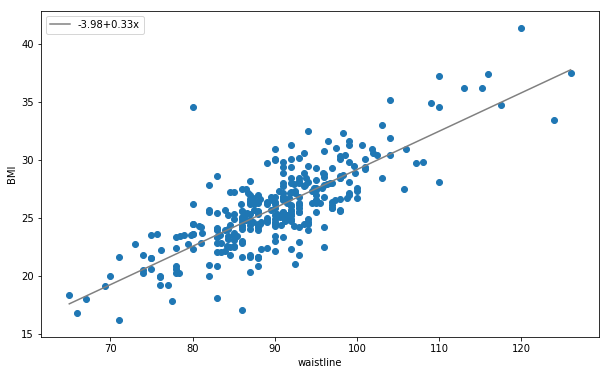

In [32]:
poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('waistline')
ax.set_ylabel('BMI')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()

plt.show()

- #### 산점도와 회귀분석
    - statsmodel 라이브러리를 사용하여 회귀분석 진행

In [33]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

df = pd.read_csv('./data/6_correlation_and_regression.csv')
df.head()

,age,height,weight,waistline,BMI,SBP
0,57,164.0,62.0,85.0,23.1,147
1,25,172.0,54.0,65.0,18.3,116
2,57,157.0,59.0,83.0,23.9,122
3,43,170.0,87.8,104.0,30.4,130
4,52,155.0,50.0,83.0,20.8,120


In [34]:
formula = 'BMI ~ waistline'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     571.5
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           3.54e-73
Time:                        19:59:47   Log-Likelihood:                -707.76
No. Observations:                 322   AIC:                             1420.
Df Residuals:                     320   BIC:                             1427.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9761      1.255     -3.169      0.002      -6.445      -1.507
waistline      0.3313      0.014     23.906      0.000       0.304       0.359
==============================================================================
Omnibus:                       35.002   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.833
Skew:                           0.424   Prob(JB):                     5.20e-25
Kurtosis:                       5.760   Cond. No.                         933.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

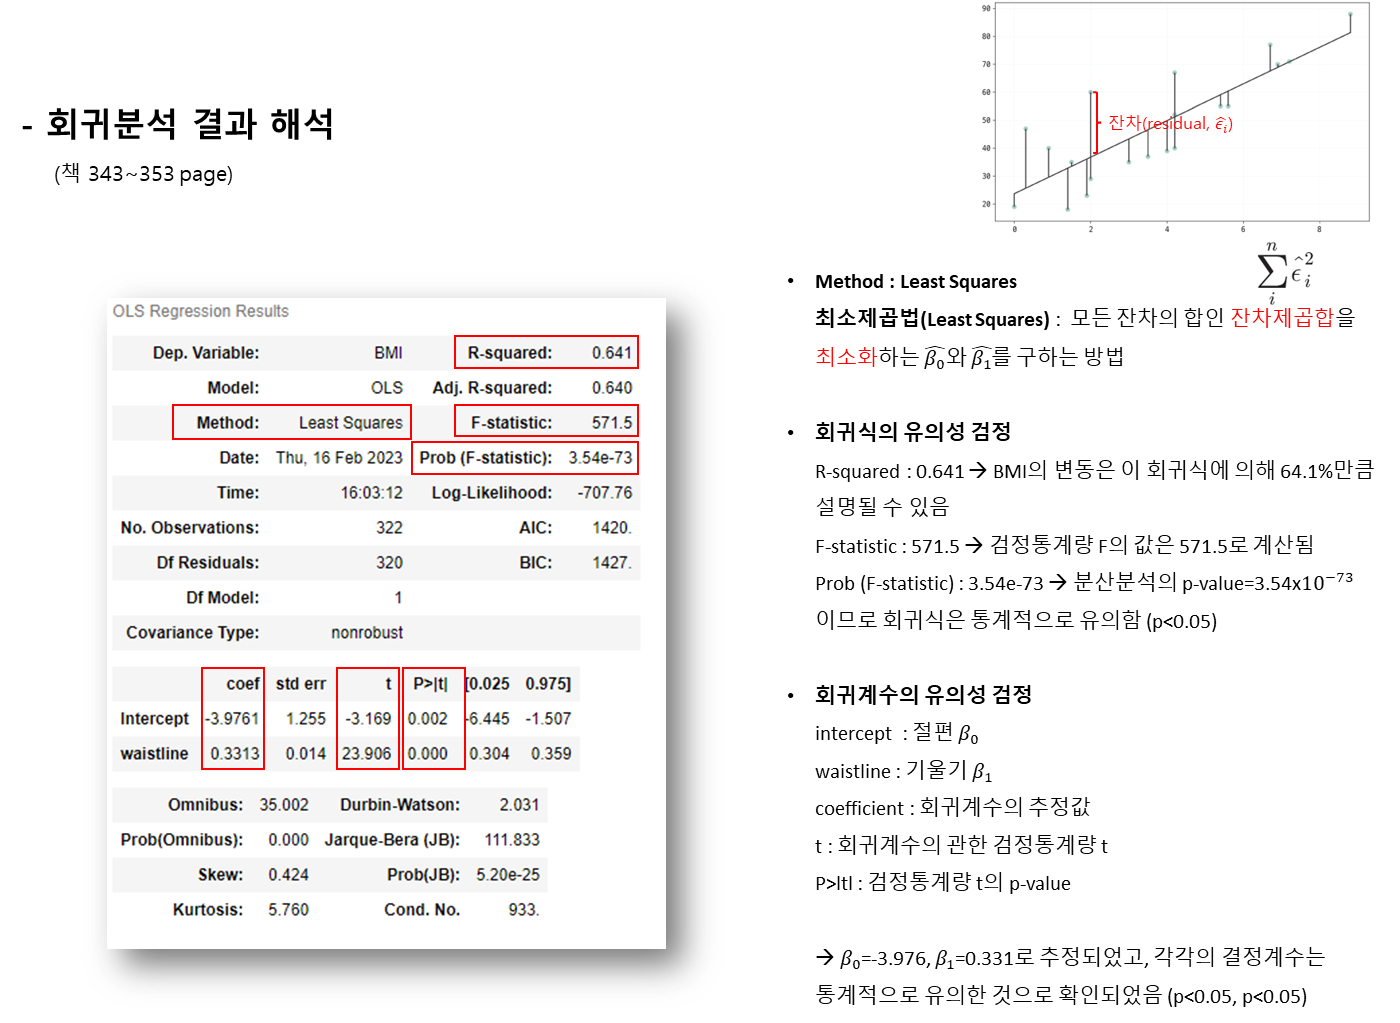